In [1]:
%load_ext autoreload
%autoreload 2
from Methods import JobOffers,dataframeHelpers

In [2]:
import os
import nltk
import re
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [3]:
autoreload JobOffers,dataframeHelpers

In [4]:
# Only run this if you want to redo the translations
# Start with google and use easynmt if it fails
# JobOffers.writeTranslatedJobs(1000, method="google", fallback=True)

In [5]:
# rawOffers = JobOffers.readJsonFile("Data/output_v1.1.json")

In [4]:
translatedOffers = JobOffers.readJsonFile("Data/output_v1.1.1000.translate.json")

In [40]:
jobsDf = dataframeHelpers.buildJobsDF("Data/output_v1.1.1000.translate.json")

In [41]:
jobsDf

,JOB_ID,ISCO,JOB_CONTENT,ORIGINAL_CONTENT,CANTON,COMPANY_SIZE
0,12220025,21420,[We are a successful and independent engineeri...,<p>Wir sind ein erfolgreiches und unabhängiges...,[BE],Kleinstunternehmen
1,10814567,21420,[We are a prestigious and successful engineeri...,Wir sind eine renommierte und erfolgreiche Ing...,[BE],Kleinstunternehmen
2,12401674,21420,[Bill Weyermann Partner AG has been producing ...,Bill Weyermann Partner AG erbringt seit über\n...,[BE],Kleinunternehmen
3,12473085,62100,[Administration Communale de Valderuzforstarti...,Administration communale de Val-de-RuzForstwar...,[NE],Kleinstunternehmen
4,12905109,26220;24210,[The Straumann Group is experiencing internati...,Le groupe Straumann connaît un succès internat...,[BE],Mittelunternehmen
...,...,...,...,...,...,...
995,17126875,24210,[Vallorbe SA Metallurgical factories are recog...,<p>Les Usines Métallurgiques de Vallorbe SA (U...,[VD],Mittelunternehmen
996,17140922,43210;24210,[Back to Search Results Apply for this item OM...,<h2>Retour aux résultats de la recherche</h2>\...,[BE],Grossunternehmen
997,17140923,24210,[Back to Search Results Apply for this item Om...,<h2>Retour aux résultats de la recherche</h2>\...,[BE],Grossunternehmen
998,17060287,24210,[You are here HomePlayController Quality HF Qu...,Vous êtes ici :AccueilEmploisContrôleur qualit...,[BE],Kleinunternehmen


In [7]:
jobsDf["CANTON1"] = jobsDf.apply(lambda x: x["CANTON"][0], axis=1)
for canton in jobsDf["CANTON1"].value_counts().index[:-1]:
    jobsDf[f"Canton_{canton}"] = jobsDf.apply(lambda x: canton in x["CANTON"], axis=1)

In [8]:
jobsDf["COMPANY_SIZE"] = jobsDf["COMPANY_SIZE"].replace("Grossunternehmen", "Large company")
jobsDf["COMPANY_SIZE"] = jobsDf["COMPANY_SIZE"].replace("Kleinstunternehmen", "micro company")
jobsDf["COMPANY_SIZE"] = jobsDf["COMPANY_SIZE"].replace("Kleinunternehmen", "small company")
jobsDf["COMPANY_SIZE"] = jobsDf["COMPANY_SIZE"].replace("Mittelunternehmen", "midsize company")
jobsDf

,JOB_ID,ISCO,JOB_CONTENT,ORIGINAL_CONTENT,CANTON,COMPANY_SIZE,CANTON1,Canton_BE,Canton_VD,Canton_NE,Canton_FR,Canton_GE,Canton_VS,Canton_JU
0,12220025,21420,[We are a successful and independent engineeri...,<p>Wir sind ein erfolgreiches und unabhängiges...,[BE],micro company,BE,True,False,False,False,False,False,False
1,10814567,21420,[We are a prestigious and successful engineeri...,Wir sind eine renommierte und erfolgreiche Ing...,[BE],micro company,BE,True,False,False,False,False,False,False
2,12401674,21420,[Bill Weyermann Partner AG has been producing ...,Bill Weyermann Partner AG erbringt seit über\n...,[BE],small company,BE,True,False,False,False,False,False,False
3,12473085,62100,[Administration Communale de Valderuzforstarti...,Administration communale de Val-de-RuzForstwar...,[NE],micro company,NE,False,False,True,False,False,False,False
4,12905109,26220;24210,[The Straumann Group is experiencing internati...,Le groupe Straumann connaît un succès internat...,[BE],midsize company,BE,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17126875,24210,[Vallorbe SA Metallurgical factories are recog...,<p>Les Usines Métallurgiques de Vallorbe SA (U...,[VD],midsize company,VD,False,True,False,False,False,False,False
996,17140922,43210;24210,[Back to Search Results Apply for this item OM...,<h2>Retour aux résultats de la recherche</h2>\...,[BE],Large company,BE,True,False,False,False,False,False,False
997,17140923,24210,[Back to Search Results Apply for this item Om...,<h2>Retour aux résultats de la recherche</h2>\...,[BE],Large company,BE,True,False,False,False,False,False,False
998,17060287,24210,[You are here HomePlayController Quality HF Qu...,Vous êtes ici :AccueilEmploisContrôleur qualit...,[BE],small company,BE,True,False,False,False,False,False,False


In [9]:
dummies = pd.get_dummies(jobsDf["COMPANY_SIZE"])
jobsDf = jobsDf.join(dummies)
jobsDf

,JOB_ID,ISCO,JOB_CONTENT,ORIGINAL_CONTENT,CANTON,COMPANY_SIZE,CANTON1,Canton_BE,Canton_VD,Canton_NE,Canton_FR,Canton_GE,Canton_VS,Canton_JU,Large company,micro company,midsize company,small company
0,12220025,21420,[We are a successful and independent engineeri...,<p>Wir sind ein erfolgreiches und unabhängiges...,[BE],micro company,BE,True,False,False,False,False,False,False,0,1,0,0
1,10814567,21420,[We are a prestigious and successful engineeri...,Wir sind eine renommierte und erfolgreiche Ing...,[BE],micro company,BE,True,False,False,False,False,False,False,0,1,0,0
2,12401674,21420,[Bill Weyermann Partner AG has been producing ...,Bill Weyermann Partner AG erbringt seit über\n...,[BE],small company,BE,True,False,False,False,False,False,False,0,0,0,1
3,12473085,62100,[Administration Communale de Valderuzforstarti...,Administration communale de Val-de-RuzForstwar...,[NE],micro company,NE,False,False,True,False,False,False,False,0,1,0,0
4,12905109,26220;24210,[The Straumann Group is experiencing internati...,Le groupe Straumann connaît un succès internat...,[BE],midsize company,BE,True,False,False,False,False,False,False,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17126875,24210,[Vallorbe SA Metallurgical factories are recog...,<p>Les Usines Métallurgiques de Vallorbe SA (U...,[VD],midsize company,VD,False,True,False,False,False,False,False,0,0,1,0
996,17140922,43210;24210,[Back to Search Results Apply for this item OM...,<h2>Retour aux résultats de la recherche</h2>\...,[BE],Large company,BE,True,False,False,False,False,False,False,1,0,0,0
997,17140923,24210,[Back to Search Results Apply for this item Om...,<h2>Retour aux résultats de la recherche</h2>\...,[BE],Large company,BE,True,False,False,False,False,False,False,1,0,0,0
998,17060287,24210,[You are here HomePlayController Quality HF Qu...,Vous êtes ici :AccueilEmploisContrôleur qualit...,[BE],small company,BE,True,False,False,False,False,False,False,0,0,0,1


In [42]:
annotatedJobs200 = pd.read_csv("Data/PreliminaryResultsUSE_MJ.csv", sep=";")
annotatedJobs200.rename(columns={"ENVIRONMENTAL IDENTITY\nMJ" : "GREEN_IDENTITY_MJ", "GREEN_IDENTITY" : "GREEN_IDENTITY_EMILY"}, inplace=True)
annotatedJobs200 = annotatedJobs200[["JOB_ID", "GREEN_IDENTITY_EMILY", "GREEN_IDENTITY_MJ"]]


In [11]:
annotatedJobs200

,JOB_ID,GREEN_IDENTITY_EMILY,GREEN_IDENTITY_MJ
0,13763695,True,FALSE
1,13462131,False,NaN
2,12220025,True,FALSE
3,13256998,True,TRUE
4,13481798,True,TRUE
...,...,...,...
195,13087413,False,TRUE
196,12265834,False,FALSE
197,12890118,True,TRUE
198,12849193,True,TRUE


<BarContainer object of 8 artists>

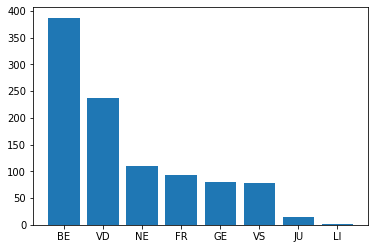

In [12]:
plt.bar(jobsDf["CANTON1"].value_counts().index, height=jobsDf["CANTON1"].value_counts())

<BarContainer object of 4 artists>

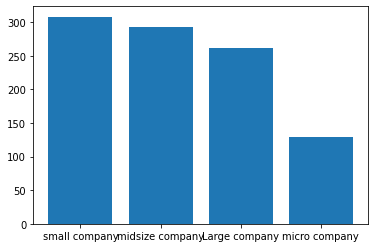

In [13]:
plt.bar(jobsDf["COMPANY_SIZE"].value_counts().index, height=jobsDf["COMPANY_SIZE"].value_counts())

In [43]:
annotatedJobs200['GREEN_IDENTITY_MJ'] = annotatedJobs200['GREEN_IDENTITY_MJ'].replace(['FALSE', 'FAUX ', '?'] , False)
annotatedJobs200['GREEN_IDENTITY_MJ'] = annotatedJobs200['GREEN_IDENTITY_MJ'].replace(['TRUE'], True)
annotatedJobs200['GREEN_IDENTITY_MJ'] = annotatedJobs200['GREEN_IDENTITY_MJ'].replace(['FAUX'] , False)
annotatedJobs200 = annotatedJobs200.drop(annotatedJobs200[annotatedJobs200['GREEN_IDENTITY_MJ'] == "same offer as above"].index)

In [44]:
annotatedJobs200[annotatedJobs200["GREEN_IDENTITY_MJ"].isna()] = False

In [17]:
# This is all the entries where my classificationn and MJ's classification differ
disagreeDf = annotatedJobs200[annotatedJobs200["GREEN_IDENTITY_MJ"] != annotatedJobs200["GREEN_IDENTITY_EMILY"].astype('bool')]

In [18]:
len(disagreeDf)

30

In [45]:
mergedDf = pd.merge(jobsDf, annotatedJobs200, on="JOB_ID")

In [46]:
mergedDf

,JOB_ID,ISCO,JOB_CONTENT,ORIGINAL_CONTENT,CANTON,COMPANY_SIZE,GREEN_IDENTITY_EMILY,GREEN_IDENTITY_MJ
0,12220025,21420,[We are a successful and independent engineeri...,<p>Wir sind ein erfolgreiches und unabhängiges...,[BE],Kleinstunternehmen,True,False
1,10814567,21420,[We are a prestigious and successful engineeri...,Wir sind eine renommierte und erfolgreiche Ing...,[BE],Kleinstunternehmen,True,True
2,12401674,21420,[Bill Weyermann Partner AG has been producing ...,Bill Weyermann Partner AG erbringt seit über\n...,[BE],Kleinunternehmen,True,False
3,12905109,26220;24210,[The Straumann Group is experiencing internati...,Le groupe Straumann connaît un succès internat...,[BE],Mittelunternehmen,False,False
4,11449790,21420;24310,[Civil Engineer as product manager SYTEC Bausy...,Bauingenieur/-in als Produktmanager\n\n\nSYTEC...,[BE],Kleinunternehmen,True,True
...,...,...,...,...,...,...,...,...
132,13785679,24210,[The Assurance Office for the Canton of Vaud h...,L'Office de l'assurance-invalidité pour le can...,[VD],Kleinunternehmen,False,False
133,13762804,21420,[We are a powerful successful and independent ...,"Wir sind ein leistungsstarkes, erfolgreiches u...",[BE],Kleinunternehmen,True,False
134,13763695,21650,"[21, 01, 2017LMT SA100 A leading group in th...",21.01.2017|LMT SA|100%\n\nUn Groupe leader dan...,[VD],Kleinunternehmen,True,False
135,13760809,21420,"[20, 01, 2017Henauer Gugler AGbern80 to 100 ...",20.01.2017|Henauer Gugler AG|Bern|80 bis 100%\...,[BE],Kleinunternehmen,True,False


In [20]:
mergedDf["ALL_SENTENCES"] = mergedDf.apply(lambda x: ". ".join(x["JOB_CONTENT"]), axis=1)
mergedDf["NumSentences"] = jobsDf.apply(lambda x: len(x["JOB_CONTENT"]), axis=1)
mergedDf["NumCharacters"] = jobsDf.apply(lambda x: sum([len(y) for y in x["JOB_CONTENT"]]), axis=1)

In [21]:
# Only take 2/3 of the "not green" jobs so you have a balanced data set
trainDf = mergedDf[((mergedDf["GREEN_IDENTITY_MJ"] == 0) & (mergedDf.index % 3 != 0)) | (mergedDf["GREEN_IDENTITY_MJ"] == 1.)]

In [22]:
trainDf

,JOB_ID,ISCO,JOB_CONTENT,ORIGINAL_CONTENT,CANTON,COMPANY_SIZE,CANTON1,Canton_BE,Canton_VD,Canton_NE,...,Canton_JU,Large company,micro company,midsize company,small company,GREEN_IDENTITY_EMILY,GREEN_IDENTITY_MJ,ALL_SENTENCES,NumSentences,NumCharacters
1,10814567,21420,[We are a prestigious and successful engineeri...,Wir sind eine renommierte und erfolgreiche Ing...,[BE],micro company,BE,True,False,False,...,False,0,1,0,0,True,True,We are a prestigious and successful engineerin...,18,1694
2,12401674,21420,[Bill Weyermann Partner AG has been producing ...,Bill Weyermann Partner AG erbringt seit über\n...,[BE],small company,BE,True,False,False,...,False,0,0,0,1,True,False,Bill Weyermann Partner AG has been producing e...,10,788
4,11449790,21420;24310,[Civil Engineer as product manager SYTEC Bausy...,Bauingenieur/-in als Produktmanager\n\n\nSYTEC...,[BE],small company,BE,True,False,False,...,False,0,0,0,1,True,True,Civil Engineer as product manager SYTEC Bausys...,24,2377
5,12849193,21420,[Works Engineer CVSE HF Losinger Marazzi Corpo...,Ingénieur Travaux CVSE (H/F)\n\nLosinger Maraz...,[VD],midsize company,VD,False,True,False,...,False,0,0,1,0,True,True,Works Engineer CVSE HF Losinger Marazzi Corpor...,6,132
6,12332746,21420,"[Dipl, Civil Engineer ETHFH Civil engineering...",Dipl. Bauingenieur ETH/FH Tiefbau\n\n\nals Pro...,[BE],micro company,BE,True,False,False,...,False,0,1,0,0,True,True,Dipl. Civil Engineer ETHFH Civil engineering ...,18,1715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,13763010,24210,[Quality Facilitator Suppliers This site uses ...,Animateur qualité fournisseurs\n\nCe site util...,[VD],midsize company,VD,False,True,False,...,False,0,0,1,0,False,False,Quality Facilitator Suppliers This site uses c...,25,2482
131,13762077,24210,"[20, 01, 2017IMMOROC SA60 BIS 80 The PACI gr...",20.01.2017|Immoroc SA|60 bis 80%\n\nLe groupe ...,[NE],small company,NE,False,False,True,...,False,0,0,0,1,False,True,20. 01. 2017IMMOROC SA60 BIS 80 The PACI gro...,13,1792
133,13762804,21420,[We are a powerful successful and independent ...,"Wir sind ein leistungsstarkes, erfolgreiches u...",[BE],small company,BE,True,False,False,...,False,0,0,0,1,True,False,We are a powerful successful and independent e...,7,141
134,13763695,21650,"[21, 01, 2017LMT SA100 A leading group in th...",21.01.2017|LMT SA|100%\n\nUn Groupe leader dan...,[VD],small company,VD,False,True,False,...,False,0,0,0,1,True,False,21. 01. 2017LMT SA100 A leading group in the...,9,992


In [29]:
len(trainDf[trainDf["GREEN_IDENTITY_MJ"] == 1])

53

In [23]:
from tensorflow.keras.utils import plot_model

In [24]:
def buildInputs(df):
    normSent = (df["NumSentences"]-df["NumSentences"].mean())/df["NumSentences"].std()
    normChar = (df["NumCharacters"]-df["NumCharacters"].mean())/df["NumCharacters"].std()
    return np.stack(
        (
            normSent, 
            normChar,
            df["Canton_BE"],
            df["Canton_VD"],
            df["Canton_NE"],
            df["Canton_FR"], 
            df["Canton_GE"],
            df["Canton_VS"],
            df["Canton_JU"],
            df["Large company"],
            df["micro company"], 
            df["midsize company"],
            df["small company"],
        ), axis=-1)  

In [25]:
inputs = buildInputs(trainDf)
tf.keras.backend.clear_session()

In [26]:
paragraphInput = tf.keras.layers.Input(shape=(), name="Input", dtype=tf.string)
paragraphEncode = hub.KerasLayer('universal-sentence-encoder_4',
                        input_shape=[], 
                        dtype=tf.string, 
                        trainable=True)(paragraphInput)


In [27]:
paragraphDense = tf.keras.layers.Dense(256, activation='relu')(paragraphEncode)

In [28]:
otherInput = tf.keras.layers.Input(shape=(inputs.shape[1],))
otherDense = tf.keras.layers.Dense(16,)(otherInput)
mergedLayer = tf.keras.layers.Concatenate()([otherDense, paragraphDense])
denseMerged = tf.keras.layers.Dense(32, activation='relu')(mergedLayer)
output = tf.keras.layers.Dense(1, activation='sigmoid')(denseMerged)

In [29]:
model = tf.keras.Model(inputs=[paragraphInput, otherInput], outputs=output)
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [35]:
model.fit(x=[trainDf["ALL_SENTENCES"], inputs], 
          y=trainDf["GREEN_IDENTITY_MJ"].astype("bool"), 
          validation_split=0.7,
          epochs=3)

Epoch 1/3
1/1 [==============================] - 6s 6s/step - loss: 0.7149 - accuracy: 0.3438 - val_loss: 0.6937 - val_accuracy: 0.4933
Epoch 2/3
1/1 [==============================] - 2s 2s/step - loss: 0.6674 - accuracy: 0.5938 - val_loss: 0.6877 - val_accuracy: 0.5200
Epoch 3/3
1/1 [==============================] - 2s 2s/step - loss: 0.6321 - accuracy: 0.7188 - val_loss: 0.6837 - val_accuracy: 0.5867


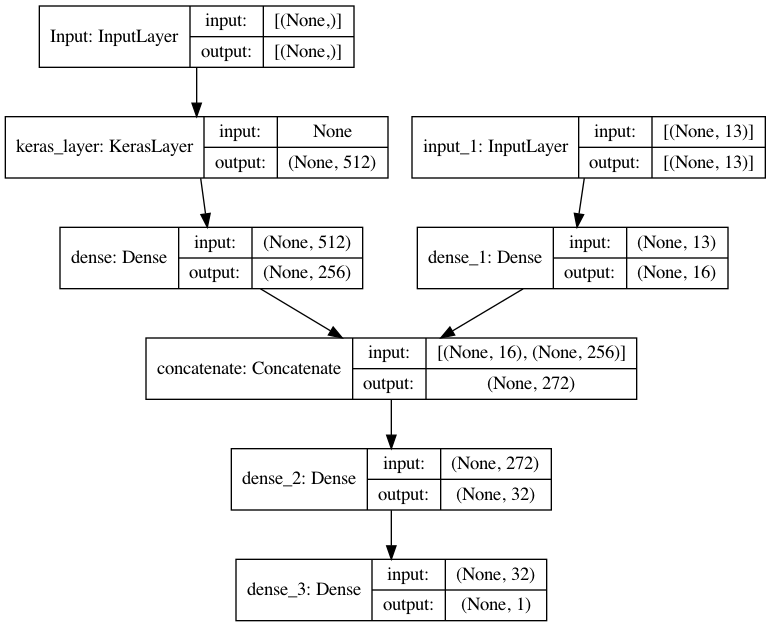

In [30]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [31]:
denseUnmerged = tf.keras.layers.Dense(32, activation='relu')(paragraphDense)
outputUnmerged = tf.keras.layers.Dense(1, activation='sigmoid')(denseUnmerged)

In [32]:
simpleModel = tf.keras.Model(inputs=[paragraphInput], outputs=outputUnmerged)
simpleModel.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [33]:
simpleModel.fit(x=[trainDf["ALL_SENTENCES"]], 
          y=trainDf["GREEN_IDENTITY_MJ"].astype("bool"), 
          validation_split=0.7,
          epochs=6)

Epoch 1/6
1/1 [==============================] - 9s 9s/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6904 - val_accuracy: 0.4933
Epoch 2/6
1/1 [==============================] - 2s 2s/step - loss: 0.6663 - accuracy: 0.5312 - val_loss: 0.6876 - val_accuracy: 0.4933
Epoch 3/6
1/1 [==============================] - 2s 2s/step - loss: 0.6417 - accuracy: 0.6250 - val_loss: 0.6830 - val_accuracy: 0.4933
Epoch 4/6
1/1 [==============================] - 2s 2s/step - loss: 0.6105 - accuracy: 0.7188 - val_loss: 0.6752 - val_accuracy: 0.5333
Epoch 5/6
1/1 [==============================] - 2s 2s/step - loss: 0.5779 - accuracy: 0.9375 - val_loss: 0.6728 - val_accuracy: 0.5200
Epoch 6/6
1/1 [==============================] - 2s 2s/step - loss: 0.5387 - accuracy: 0.9062 - val_loss: 0.6713 - val_accuracy: 0.5333


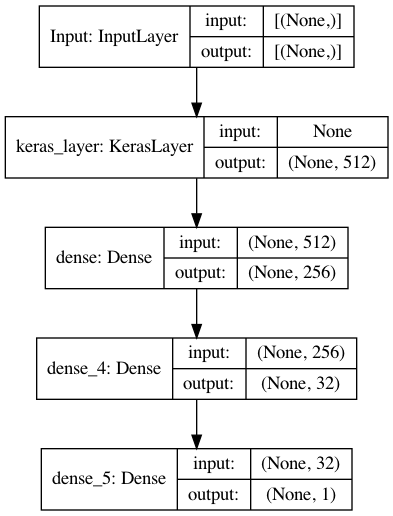

In [34]:
plot_model(simpleModel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
validInputs = buildInputs(mergedDf)

In [ ]:
mergedDf["GREEN_PREDICT"] = model.predict(x=[mergedDf["ALL_SENTENCES"], validInputs]) > 0.5

In [ ]:
len(mergedDf[(mergedDf["GREEN_PREDICT"] != mergedDf["GREEN_IDENTITY_MJ"]) & ~mergedDf["GREEN_IDENTITY_MJ"].isna()])/len(mergedDf)

In [ ]:
len(mergedDf[mergedDf["GREEN_PREDICT"] & ~mergedDf["GREEN_IDENTITY_MJ"].astype("bool")])

In [ ]:
#trainDf["GREEN_PREDICT"] = model.predict(trainDf["FIRST_SENTENCE"]) > 0.5

In [ ]:
denseUnMerged = tf.keras.layers.Dense(32, activation='relu')(paragraphOutput)